# Data preprocessing and EDA

## Import Libraries & Load Dataset

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime

warnings.filterwarnings("ignore")

In [5]:
# Load dataset
df = pd.read_csv("ParisHousing.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (10000, 17)


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [7]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [9]:
df.nunique()

squareMeters          9483
numberOfRooms          100
hasYard                  2
hasPool                  2
floors                 100
cityCode              9509
cityPartRange           10
numPrevOwners           10
made                    32
isNewBuilt               2
hasStormProtector        2
basement              6352
attic                 6267
garage                 901
hasStorageRoom           2
hasGuestRoom            11
price                10000
dtype: int64

In [84]:
print("\nData types:\n", df.dtypes)


Data types:
 squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
house_age              int64
dtype: object


*In the Paris Housing dataset, all features are already numerical. Therefore, no encoding (e.g., one-hot or label encoding) is necessary for this dataset.*

## Feature Engineering

In [12]:
# Create a new column 'house_age' from the 'made' year
current_year = datetime.datetime.now().year
df["house_age"] = current_year - df["made"]

# Drop 'made' column
df.drop(columns=["made"], inplace=True)

*We enhance the dataset by calculating the age of each house based on its construction year.*

*The `house_age` feature gives more meaningful information to the model compared to using the raw construction year. Once this new column is created, the original `made` column is removed as it's no longer needed.*

## Preprocessing (Standardization)

In [15]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(columns=["price"])
y = df["price"]

# Standardize the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Combine scaled features with the target
df_processed = pd.concat([X_scaled, y], axis=1)

# Preview the processed data
df_processed.head()


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,house_age,price
0,0.891562,-1.643518,-1.017554,1.006421,0.440453,-1.408453,-0.874027,0.867593,-0.998202,1.0002,-0.250333,1.374130,1.537488,-1.006018,0.631373,0.052484,7559081.5
1,1.073956,-0.394180,0.982749,1.006421,1.652041,-0.373880,0.866993,0.167441,1.001802,-0.9998,-0.479772,-0.895592,-1.622370,0.994018,-0.942810,-1.021904,8085989.5
2,0.203033,0.265193,-1.017554,1.006421,-1.082685,-0.543643,0.170585,0.867593,-0.998202,-0.9998,-0.728678,1.321265,-1.595657,0.994018,1.261046,-1.666537,5574642.1
3,-0.610092,-0.116549,-1.017554,-0.993620,-1.532703,-0.768361,1.563401,-0.532710,-0.998202,1.0002,-1.520589,0.730080,-0.740816,-1.006018,-0.627973,-0.699588,3232561.2
4,0.714521,-1.088257,0.982749,1.006421,1.375106,-0.419941,-0.874027,0.517517,1.001802,-0.9998,1.182616,-0.898010,-0.996505,0.994018,-0.313136,1.664066,7055052.0


*Feature scaling is an important step before training most machine learning models.*

*We use standardization to transform all numerical features so they have a mean of 0 and standard deviation of 1. This helps improve the performance and convergence speed of many algorithms.*

*The final preprocessed dataset (`df_processed`) contains scaled features and the original target (`price`) and is now ready for analysis and modeling.*

## Exploratory Data Analysis (EDA)

### Price Distribution

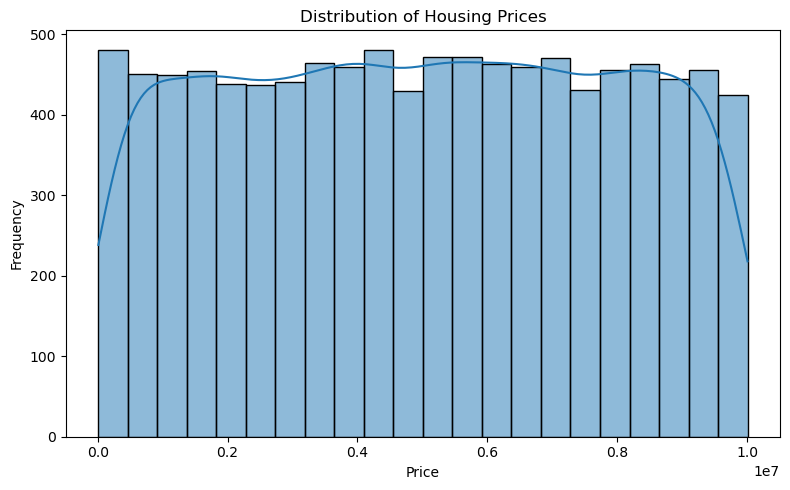

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price distribution plot

plt.figure(figsize=(8, 5))
sns.histplot(df["price"], kde=True,)
plt.title("Distribution of Housing Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

*The distribution of housing prices helps us understand the range, central tendency, and skewness of the target variable.*

*This histogram shows how prices are spread out. If it's highly skewed, a log transformation might be considered (not needed here as it is relatively normal).*

### Correlation Matrix

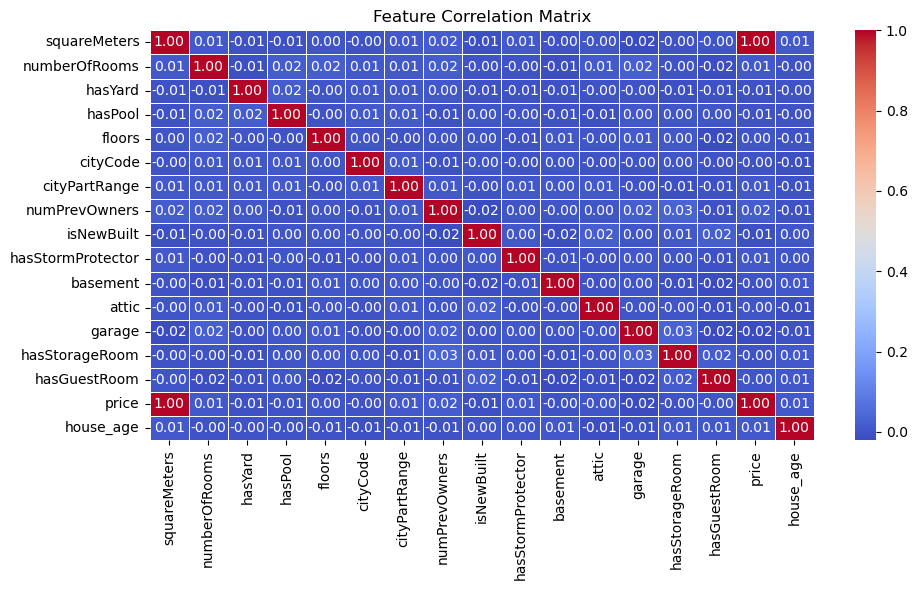

In [29]:
# Compute correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

*The correlation matrix shows how strongly each feature is linearly related to the target (`price`) and to each other.*

*High correlation with `price` indicates strong predictive potential. Features like `squareMeters` typically show high positive correlation.*

### Scatter Plots – Feature vs Price

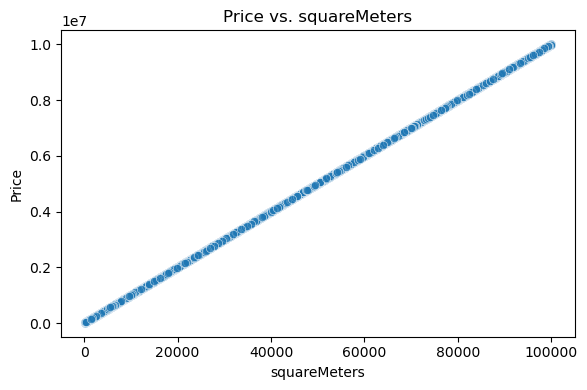

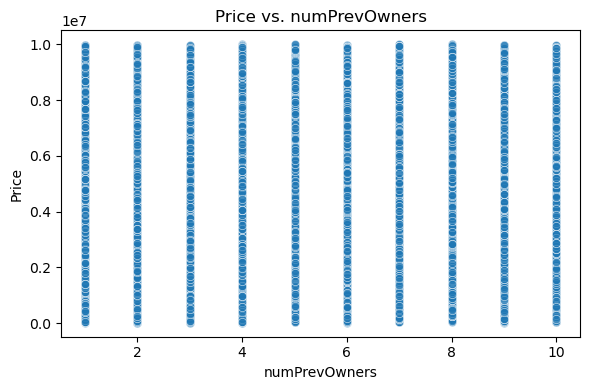

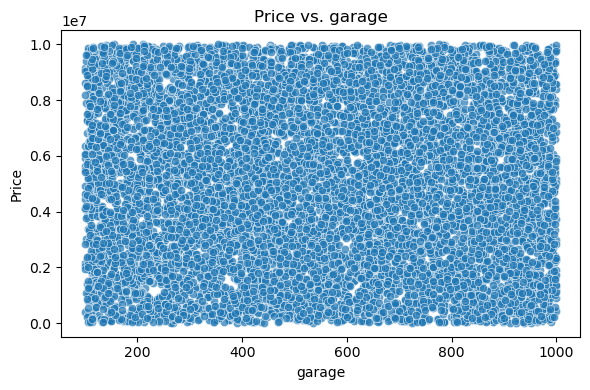

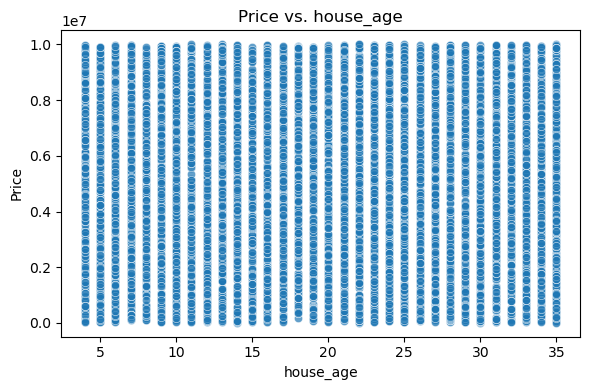

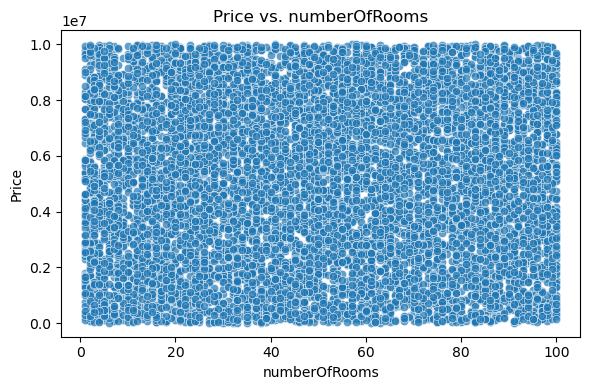

In [35]:
# Features with notable correlation to 'price'
relevant_features = ['squareMeters', 'numPrevOwners', 'garage', 'house_age', 'numberOfRooms']

for feature in relevant_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y='price', alpha=0.7)
    plt.title(f"Price vs. {feature}")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.tight_layout()
    plt.show()

**To explore the relationship between selected features and the target variable price, we plotted scatter plots for the following variables that showed notable correlation in the heatmap:**

**Selected Features:**

*squareMeters: Very strong positive correlation with price, as larger homes naturally cost more.*

*numPrevOwners: Slight positive relationship; may reflect the property’s turnover or condition history.*

*garage: Slight negative correlation; homes with or without garages may show different pricing trends.*

*house_age: Weak but notable correlation; older houses might be priced lower or higher depending on other conditions.*

*numberOfRooms: Though not strongly correlated, still important as room count is a basic indicator of size and functionality.*

**These scatter plots help visually examine:**

*Linear trends between individual features and price.*

*Clusters or spread in data distributions.*

*Outliers, which are points that deviate significantly from general trends.*

*By identifying these relationships, we can prioritize features that are more predictive for modeling house prices.*

### Outlier Detection – Boxplots

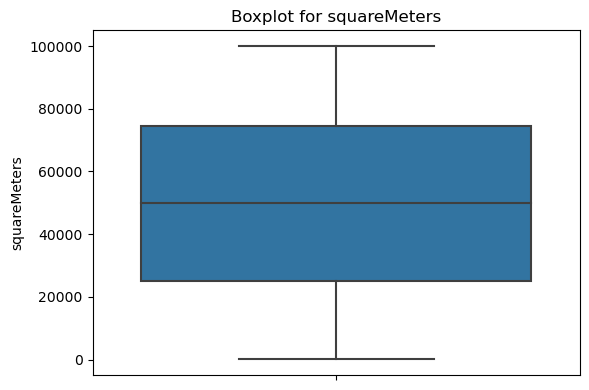

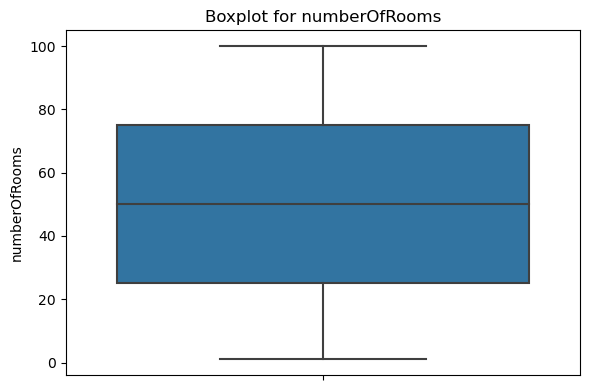

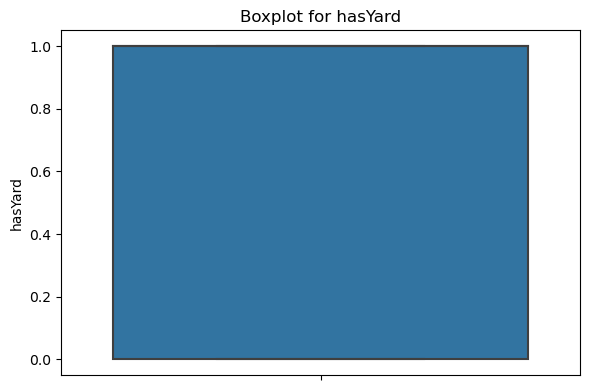

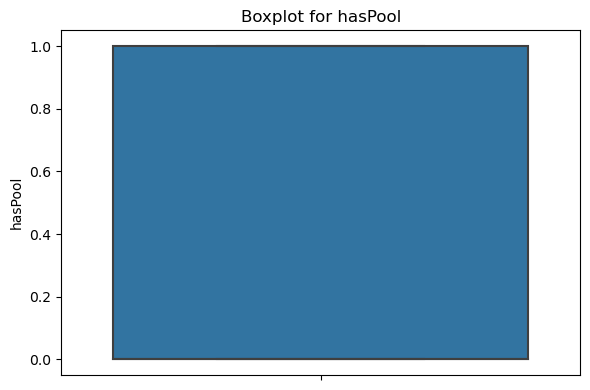

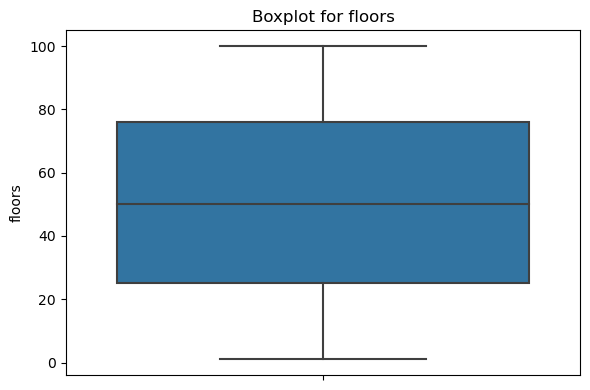

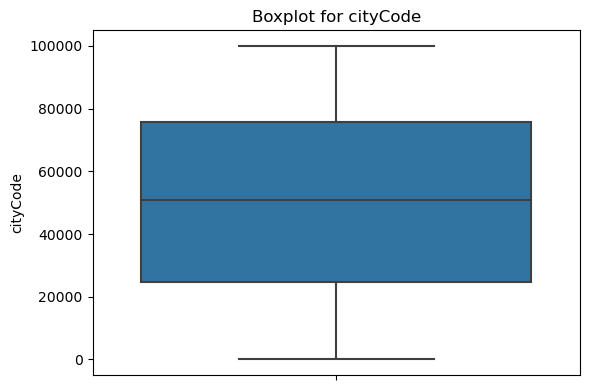

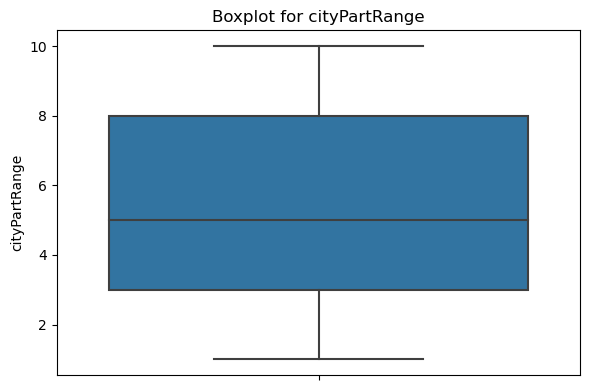

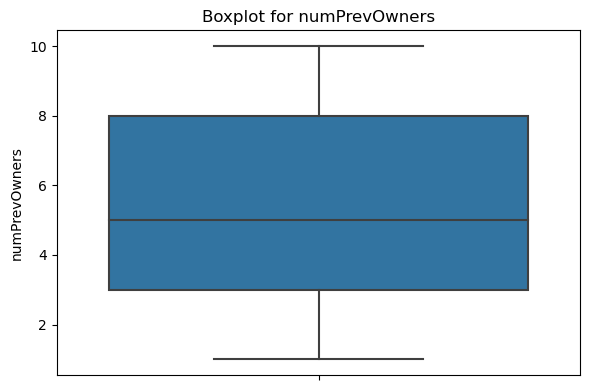

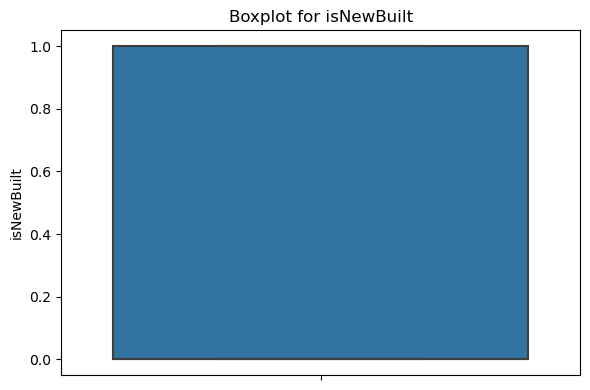

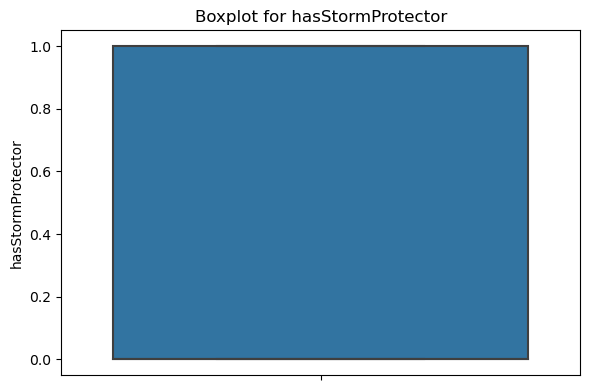

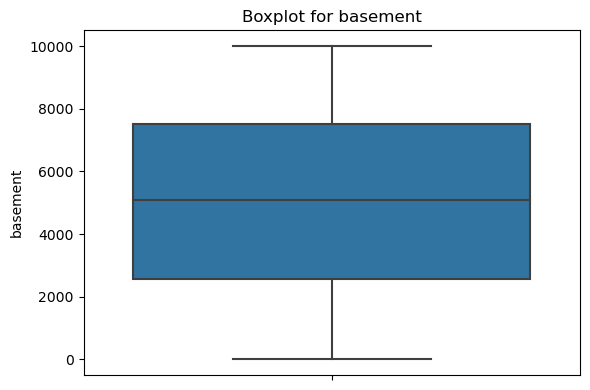

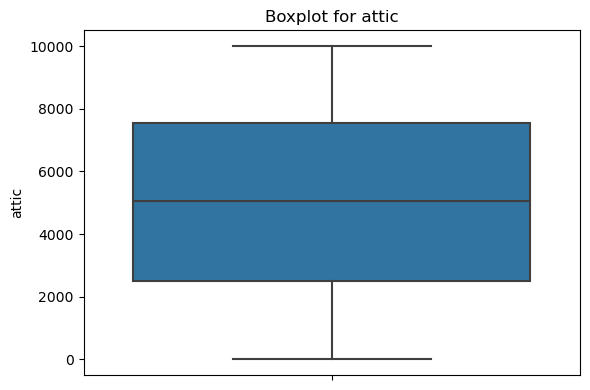

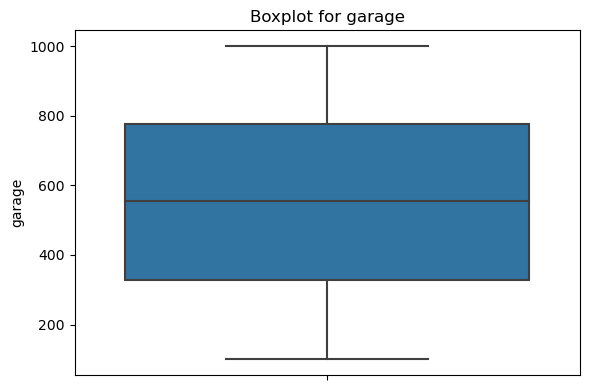

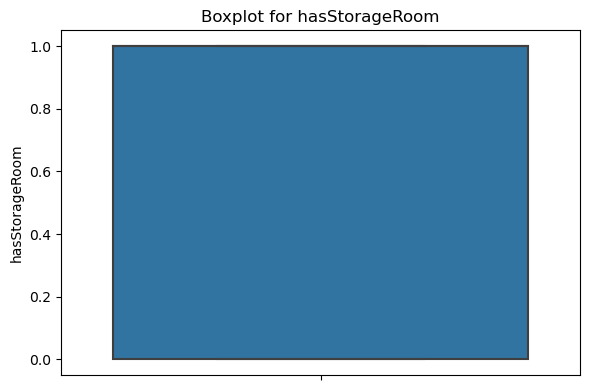

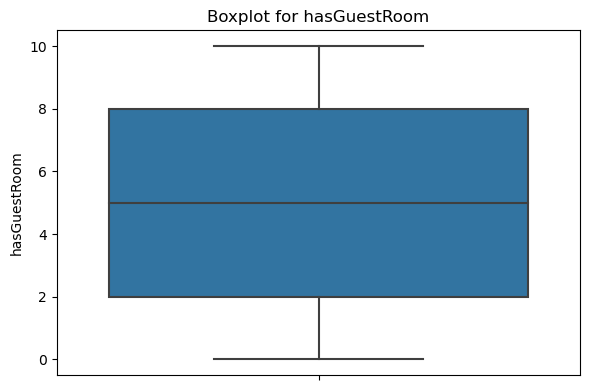

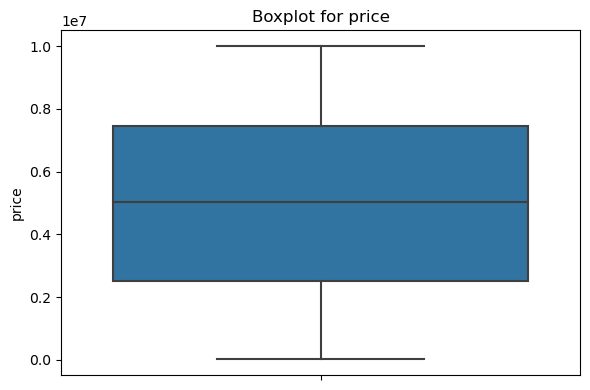

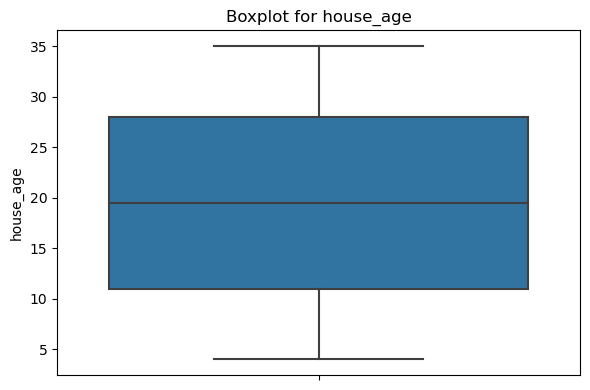

In [40]:
# Select numeric features
numeric_cols = df.select_dtypes(include='number').columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot for {col}")
    plt.tight_layout()
    plt.show()

**To identify outliers and spot skewness in the dataset, we created boxplots for all numerical features. Boxplots provide a visual summary of the distribution, central tendency, and variability of each feature. They are particularly helpful for detecting potential outliers and asymmetries.**

**Upon analysis of the boxplots:**

*No significant outliers were observed across the features.*

*Some features showed minor skewness, which may be addressed later during model tuning or transformation.*

*The target variable price appeared mostly symmetrical with no extreme values.*

**Boxplots were generated for the following key numerical features:**

`price`

`squareMeters`

`numberOfRooms`

`numPrevOwners`

`garage`

`house_age`

*Other numeric binary indicators like hasYard, hasPool, etc., were also checked but showed no issues.*

*This step confirms that the dataset is largely clean in terms of outliers and ready for model development.*

### Price Trends Over Time Across Suburbs

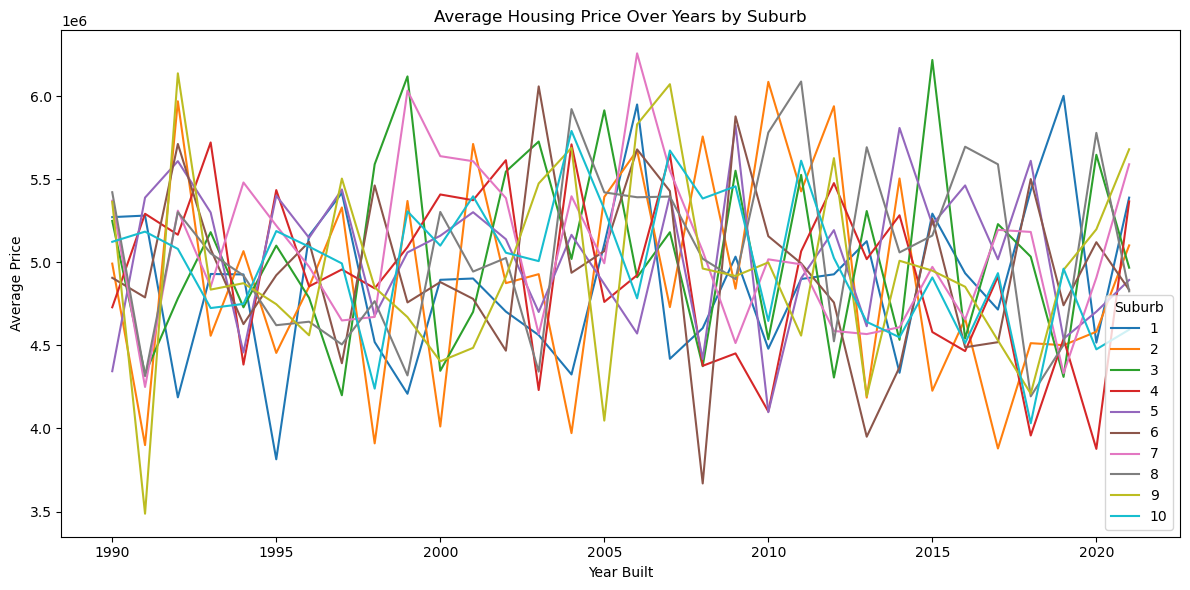

In [43]:
# Create copy and compute build year
df_trend = df.copy()
df_trend["year_built"] = 2025 - df_trend["house_age"]

# Group by year built and suburb (cityPartRange)
price_by_year_suburb = (df_trend.groupby(["year_built", "cityPartRange"])["price"].mean().reset_index())

# Line plot: average price by year built and suburb
plt.figure(figsize=(12, 6))
sns.lineplot(data=price_by_year_suburb, x="year_built", y="price", hue="cityPartRange", palette="tab10")
plt.title("Average Housing Price Over Years by Suburb")
plt.xlabel("Year Built")
plt.ylabel("Average Price")
plt.legend(title="Suburb")
plt.tight_layout()
plt.show()

**We estimate the year a house was built using the already engineered house_age feature:**

`year_built = 2025 - house_age`

*This helps us visualize how property prices changed based on the year of construction.*

**We group the dataset by:**

`year_built: Estimated year of construction`

`cityPartRange: A proxy for suburb or locality`

*We then compute the average price of houses for each suburb-year combination.*

**We create a line plot to observe how the average housing price has varied over construction years across suburbs:**

`x-axis: year_built`

`y-axis: Average price`

`hue: Suburb (cityPartRange)`

*A tab10 color palette ensures each suburb is represented by a distinct color.*

### Price Distribution Across Suburbs

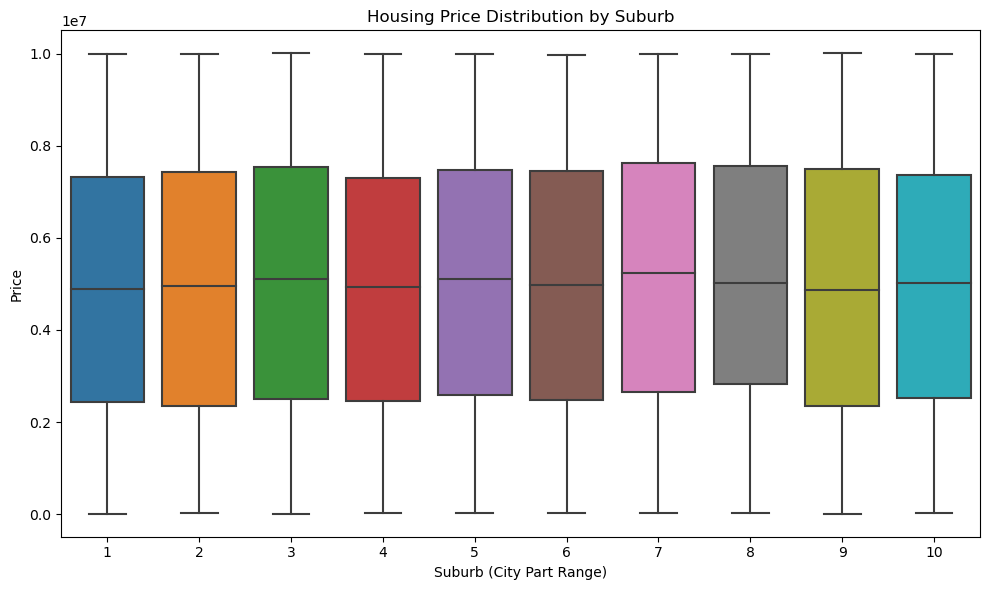

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_trend, x="cityPartRange", y="price")
plt.title("Housing Price Distribution by Suburb")
plt.xlabel("Suburb (City Part Range)")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

**To explore price variability:**

*A boxplot is used to visualize the distribution of housing prices within each suburb.*

*This highlights central tendency, spread, and potential outliers.*

## Model Development and Evaluation

### Model Building

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

**Linear Regression:** *Assumes a linear relationship between features and target.*

**Random Forest:** *Builds multiple decision trees and averages their results.*

**XGBoost:** *A powerful boosting algorithm that builds trees sequentially to improve accuracy.*

*All models are stored in a dictionary (models) for easy access during training and evaluation.*

### Evaluation

In [56]:
from sklearn.model_selection import KFold, cross_validate

# K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluation function
def evaluate_model(name, model):
    scores = cross_validate(
        model, X_scaled, y, cv=kf,
        scoring={
            'MAE': 'neg_mean_absolute_error',
            'RMSE': 'neg_root_mean_squared_error',
            'R2': 'r2'
        }
    )
    return {
        "Model": name,
        "MAE": -scores['test_MAE'].mean(),
        "RMSE": -scores['test_RMSE'].mean(),
        "R²": scores['test_R2'].mean()
    }

# Run evaluations
results = [evaluate_model(name, model) for name, model in models.items()]
results_df = pd.DataFrame(results).sort_values(by="RMSE")
print(results_df)

               Model           MAE          RMSE        R²
0  Linear Regression   1480.971649   1900.103655  1.000000
1      Random Forest   3096.669454   3873.872636  0.999998
2            XGBoost  11816.844601  14446.832661  0.999975


**Using 5-Fold Cross-Validation to evaluate each model:**

*KFold(n_splits=5): Splits the data into 5 parts for training/testing.*

*cross_validate(): Runs each model and collects MAE, RMSE, and R² scores.*

*The function evaluate_model() returns the average score across folds.*

*All results are stored in results_df and sorted by RMSE for comparison.*


## Feature Importance

### Tree-based model

In [63]:
# Train best model
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_scaled, y)

# Feature importance
feat_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_importance.head(10))

          Feature    Importance
0    squareMeters  9.999990e-01
4          floors  1.360214e-07
11          attic  1.077069e-07
5        cityCode  9.963453e-08
1   numberOfRooms  9.613649e-08
12         garage  9.531462e-08
10       basement  9.417871e-08
15      house_age  8.864119e-08
7   numPrevOwners  6.959767e-08
14   hasGuestRoom  6.921209e-08


**It trains the Random Forest model on the full dataset and extracts feature importance scores:**

*fit(): Trains the model using standardized features and target (price).*

*.feature_importances_: Measures how much each feature contributes to the prediction.*

*A DataFrame feat_importance is created to list features sorted by their importance.*

*This helps identify which features most influence housing prices.*

### SHAP Feature Importance

In [67]:
import shap

# SHAP on sample
X_sample = X_scaled.sample(n=500, random_state=42)
explainer = shap.Explainer(best_model, X_sample)
shap_values = explainer(X_sample)

# SHAP importance
shap_importance = pd.DataFrame({
    'Feature': X.columns,
    'Mean SHAP Value': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Mean SHAP Value', ascending=False)

print(shap_importance.head(10))

 96%|=================== | 481/500 [00:19<00:00]       

          Feature  Mean SHAP Value
0    squareMeters     2.529912e+06
4          floors     2.163776e+02
3         hasPool     8.739261e+01
1   numberOfRooms     8.146526e+01
5        cityCode     7.968818e+01
11          attic     7.869490e+01
2         hasYard     7.794436e+01
12         garage     7.647205e+01
10       basement     7.198214e+01
15      house_age     7.120256e+01


**This section uses SHAP (SHapley Additive exPlanations) to interpret model predictions:**

*A sample of 500 rows is used for efficiency.*

*shap.Explainer() creates an explainer for the trained model.*

*shap_values quantify each feature's contribution to predictions.*

*The average absolute SHAP values are computed to rank feature importance.*

*This provides a more interpretable, model-agnostic view of which features drive the predictions.*

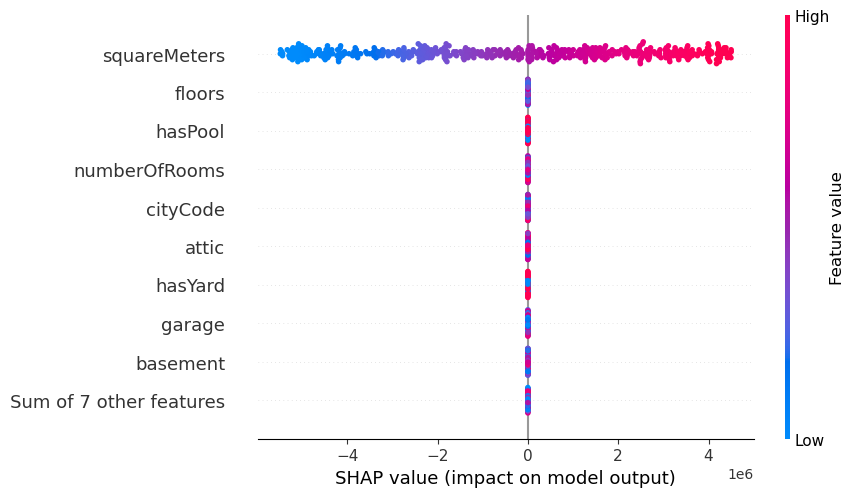

In [69]:
# SHAP summary plot 
shap.plots.beeswarm(shap_values)

## Model deployment

### Save the Trained Model

In [76]:
import joblib

# Save
joblib.dump(best_model, 'best_model.pkl', compress=3)
joblib.dump(scaler, 'scaler.pkl', compress=3)

['scaler.pkl']

### Deployment App (Streamlit UI)

In [79]:
%%writefile app.py

import streamlit as st
import joblib
import numpy as np

# Load model and scaler
model = joblib.load('best_model.pkl')
scaler = joblib.load('scaler.pkl')

st.title("Housing Price Predictor")
st.markdown("Enter the property details below:")

# Input fields
squareMeters = st.number_input("Total Area (in square meters)", min_value=10, max_value=1000)
numberOfRooms = st.number_input("Number of Rooms", min_value=1, max_value=20)
hasYard = st.selectbox("Has Yard?", ["No", "Yes"])
hasPool = st.selectbox("Has Pool?", ["No", "Yes"])
floors = st.number_input("Number of Floors", min_value=1, max_value=10)
cityCode = st.number_input("City Code", min_value=1)
cityPartRange = st.number_input("City Part Range", min_value=1)
numPrevOwners = st.number_input("Number of Previous Owners", min_value=0)
isNewBuilt = st.selectbox("Is Newly Built?", ["No", "Yes"])
hasStormProtector = st.selectbox("Has Storm Protector?", ["No", "Yes"])
basement = st.selectbox("Has Basement?", ["No", "Yes"])
attic = st.selectbox("Has Attic?", ["No", "Yes"])
garage = st.selectbox("Has Garage?", ["No", "Yes"])
hasStorageRoom = st.selectbox("Has Storage Room?", ["No", "Yes"])
hasGuestRoom = st.selectbox("Has Guest Room?", ["No", "Yes"])
house_age = st.number_input("House Age (in years)", min_value=0, max_value=200)

# Convert binary
binary_map = lambda x: 1 if x == "Yes" else 0
input_data = [
    squareMeters,
    numberOfRooms,
    binary_map(hasYard),
    binary_map(hasPool),
    floors,
    cityCode,
    cityPartRange,
    numPrevOwners,
    binary_map(isNewBuilt),
    binary_map(hasStormProtector),
    binary_map(basement),
    binary_map(attic),
    binary_map(garage),
    binary_map(hasStorageRoom),
    binary_map(hasGuestRoom),
    house_age
]

# Predict
if st.button("Predict Price"):
    input_array = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    prediction = model.predict(input_scaled)[0]
    st.success(f"Predicted House Price: ${prediction:,.2f}")

Overwriting app.py


### How the Streamlit App Works

This Streamlit app allows users to predict house prices by entering key property features.

#### 1. Loading the Model
The app loads a trained machine learning model from the file `best_model.pkl` using `joblib.load()`. This model was trained earlier using the full dataset.

#### 2. Input Collection
The app uses Streamlit widgets (`st.number_input`, `st.selectbox`) to collect user input for 16 features:
- Area in square meters
- Number of rooms
- Yard, Pool, Basement, Attic, Garage (0 = No, 1 = Yes)
- House age, floors, city details, and more

Each input is saved into a variable.

#### 3. Making a Prediction
When the user clicks the **"Predict Price"** button:
- All inputs are combined into a single-row DataFrame (`input_data`)
- The model makes a prediction using `model.predict(input_data)`
- The predicted price is shown using `st.success()`

#### 4. Output
The final output is a clean prediction of the house price based on the inputs provided.

### Requirements for Deployment

To run this app on Streamlit Cloud or locally, ensure to include a `requirements.txt` file with the following libraries:

streamlit
pandas
numpy
scikit-learn
joblib
shap
matplotlib

***Deploying My App with Streamlit Cloud***

**I pushed the following files to a public GitHub repo:**

*app.py – my Streamlit app code*

*best_model.pkl – the trained machine learning model*

*requirements.txt – all the libraries used*

*Then I went to https://streamlit.io/cloud.*

*I clicked “Deploy an app” and connected it to my GitHub repository.*

*After deployment, I got a live URL that I can share to let others try the app online.*